<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_03_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 03
###Prof. Pedro Constantino

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#**Problema 1(a)**

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
A[0,0]=5
A[0,1]=-3

for i in range(1,n-1):
    A[i,i-1]=-2   # Todos os coeficientes da diagonal inferior de A são -2
    A[i,i]=5    # Todos os coeficientes da diagonal principal de A são 5
    A[i,i+1]=-3   # Todos os coeficientes da diagonal superior de A são -3

A[n-1,n-2]=-2
A[n-1,n-1]=5

print(A)

[[ 5. -3.  0. ...  0.  0.  0.]
 [-2.  5. -3. ...  0.  0.  0.]
 [ 0. -2.  5. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5. -3.  0.]
 [ 0.  0.  0. ... -2.  5. -3.]
 [ 0.  0.  0. ...  0. -2.  5.]]


In [ ]:
# Resolvendo o sistema Ax = b pelo Método de Jacobi

def linear_jacobi(A, b, x):
    n = len(b)
    tol = 1e-3  # tolerância para convergência
    count = 0
    count_max = 5e3  # número máximo de iterações
    err = np.linalg.norm(np.dot(A, x) - b)  # critério de convergência

    while err > tol:
        xold = x.copy()  # armazena os valores antigos de x

        # Atualiza x usando o método iterativo de Jacobi
        x[0] = b[0] / A[0, 0]
        for i in range(1, n):
            S = b[i]
            for j in range(1, i):
                S = S - A[i, j] * xold[j]
            for j in range(i + 1, n):
                S = S - A[i, j] * xold[j]
            x[i] = S / A[i, i]

        count += 1

        # Verifica se o número máximo de iterações foi atingido
        if count > count_max:
            print(f'Não convergiu na iteração {count}.')
            break

        # Calcula o erro e exibe na tela
        err = np.linalg.norm(np.dot(A, x) - b)
        print(f'k = {count} \t erro = {err:.4e}')

    return x

# Chute inicial para o vetor x:
x_initial = 5*np.ones(n)

x = linear_jacobi(A,b,x_initial)
print("\nO vetor de solução do sistema calculado através do Método de Jacobi é: \n")
print(x)

Streaming output truncated to the last 5000 lines.
k = 22 	 erro = 1.4738e+01
k = 23 	 erro = 1.4857e+01
k = 24 	 erro = 1.5012e+01
k = 25 	 erro = 1.5138e+01
k = 26 	 erro = 1.5296e+01
k = 27 	 erro = 1.5428e+01
k = 28 	 erro = 1.5588e+01
k = 29 	 erro = 1.5725e+01
k = 30 	 erro = 1.5886e+01
k = 31 	 erro = 1.6028e+01
k = 32 	 erro = 1.6191e+01
k = 33 	 erro = 1.6336e+01
k = 34 	 erro = 1.6501e+01
k = 35 	 erro = 1.6650e+01
k = 36 	 erro = 1.6816e+01
k = 37 	 erro = 1.6968e+01
k = 38 	 erro = 1.7135e+01
k = 39 	 erro = 1.7290e+01
k = 40 	 erro = 1.7459e+01
k = 41 	 erro = 1.7616e+01
k = 42 	 erro = 1.7786e+01
k = 43 	 erro = 1.7946e+01
k = 44 	 erro = 1.8117e+01
k = 45 	 erro = 1.8279e+01
k = 46 	 erro = 1.8451e+01
k = 47 	 erro = 1.8615e+01
k = 48 	 erro = 1.8788e+01
k = 49 	 erro = 1.8953e+01
k = 50 	 erro = 1.9128e+01
k = 51 	 erro = 1.9295e+01
k = 52 	 erro = 1.9470e+01
k = 53 	 erro = 1.9639e+01
k = 54 	 erro = 1.9815e+01
k = 55 	 erro = 1.9985e+01
k = 56 	 erro = 2.0162e+01
k = 

#**Problema 1(b)**

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
A[0,0]=5
A[0,1]=-3

for i in range(1,n-1):
    A[i,i-1]=-2   # Todos os coeficientes da diagonal inferior de A são -2
    A[i,i]=5    # Todos os coeficientes da diagonal principal de A são 5
    A[i,i+1]=-3   # Todos os coeficientes da diagonal superior de A são -3

A[n-1,n-2]=-2
A[n-1,n-1]=5

print(A)

[[ 5. -3.  0. ...  0.  0.  0.]
 [-2.  5. -3. ...  0.  0.  0.]
 [ 0. -2.  5. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5. -3.  0.]
 [ 0.  0.  0. ... -2.  5. -3.]
 [ 0.  0.  0. ...  0. -2.  5.]]


In [ ]:
# Resolvendo o sistema Ax = b pelo Método de Gauss-Seidel

def linear_gauss_seidel(A, b, x):
    # A = matriz de coeficientes n x n
    # b = vetor n x 1
    # x = vetor n x 1 de chutes iniciais
    n = len(b)
    tol = 1e-6  # tolerância para convergência
    count = 0
    count_max = 1e3  # número máximo de iterações
    err = np.linalg.norm(A @ x - b)  # critério de convergência

    while err > tol:

        # primeira entrada
        i = 0
        S = b[i]
        for j in range(1, n):
            S = S - A[i, j] * x[j]
        x[0] = S / A[i, i]

        # entradas interiores
        for i in range(1, n - 1):
            S = b[i]
            for j in range(i):
                S = S - A[i, j] * x[j]
            for j in range(i + 1, n):
                S = S - A[i, j] * x[j]
            x[i] = S / A[i, i]

        # última entrada
        i = n - 1
        S = b[i]
        for j in range(n - 1):
            S = S - A[i, j] * x[j]
        x[n - 1] = S / A[i, i]

        # atualiza contador e verifica se muitas iterações
        count = count + 1
        if count > count_max:
            print(f'Não convergiu em k = {count}.')
            x = np.zeros(n)  # valor nulo
            break

        # calcula erro e exibe na tela
        err = np.linalg.norm(A @ x - b)
        print(f'k = {count} \t erro = {err:.4e}')

    return x

# Chute inicial para o vetor x:
x_initial = np.ones(n)

x = linear_gauss_seidel(A,b,x_initial)
print("\nO vetor de solução do sistema calculado através do Método Gauss-Seidel é: \n")
print(x)

k = 1 	 erro = 9.8486e+00
k = 2 	 erro = 9.7677e+00
k = 3 	 erro = 9.7227e+00
k = 4 	 erro = 9.6879e+00
k = 5 	 erro = 9.6569e+00
k = 6 	 erro = 9.6279e+00
k = 7 	 erro = 9.6001e+00
k = 8 	 erro = 9.5732e+00
k = 9 	 erro = 9.5469e+00
k = 10 	 erro = 9.5212e+00
k = 11 	 erro = 9.4960e+00
k = 12 	 erro = 9.4712e+00
k = 13 	 erro = 9.4468e+00
k = 14 	 erro = 9.4226e+00
k = 15 	 erro = 9.3988e+00
k = 16 	 erro = 9.3751e+00
k = 17 	 erro = 9.3517e+00
k = 18 	 erro = 9.3284e+00
k = 19 	 erro = 9.3053e+00
k = 20 	 erro = 9.2823e+00
k = 21 	 erro = 9.2595e+00
k = 22 	 erro = 9.2368e+00
k = 23 	 erro = 9.2142e+00
k = 24 	 erro = 9.1917e+00
k = 25 	 erro = 9.1692e+00
k = 26 	 erro = 9.1469e+00
k = 27 	 erro = 9.1246e+00
k = 28 	 erro = 9.1023e+00
k = 29 	 erro = 9.0801e+00
k = 30 	 erro = 9.0579e+00
k = 31 	 erro = 9.0358e+00
k = 32 	 erro = 9.0137e+00
k = 33 	 erro = 8.9917e+00
k = 34 	 erro = 8.9696e+00
k = 35 	 erro = 8.9476e+00
k = 36 	 erro = 8.9256e+00
k = 37 	 erro = 8.9036e+00
k = 38 	 e

#**Problema 1(c)**

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
A[0,0]=5
A[0,1]=-3

for i in range(1,n-1):
    A[i,i-1]=-2   # Todos os coeficientes da diagonal inferior de A são -2
    A[i,i]=5    # Todos os coeficientes da diagonal principal de A são 5
    A[i,i+1]=-3   # Todos os coeficientes da diagonal superior de A são -3

A[n-1,n-2]=-2
A[n-1,n-1]=5

print(A)

[[ 5. -3.  0. ...  0.  0.  0.]
 [-2.  5. -3. ...  0.  0.  0.]
 [ 0. -2.  5. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5. -3.  0.]
 [ 0.  0.  0. ... -2.  5. -3.]
 [ 0.  0.  0. ...  0. -2.  5.]]


In [ ]:
# Resolvendo o sistema Ax = b pelo Método SOR

def linear_SOR(A, b, x, w):
    # A = matriz de coeficientes n x n
    # b = vetor n x 1
    # x = vetor n x 1 de suposições iniciais
    # w = parâmetro SOR
    n = len(b)
    tol = 1e-8  # tolerância para convergência
    count = 0
    count_max = 1e3  # número máximo de iterações
    err = np.linalg.norm(A @ x - b)  # critério de convergência

    while err > tol:
        for i in range(n):
            S = 0
            for j in range(n):
                S = S + A[i, j] * x[j]
            x[i] = x[i] + w * (b[i] - S) / A[i, i]

        err = np.linalg.norm(A @ x - b)

        # atualiza contador e verifica se muitas iterações
        count = count + 1
        if count > count_max:
            print(f'Não convergiu em k = {count}.')
            x = np.zeros(n)  # valor nulo
            break

        # calcula erro e exibe na tela
        err = np.linalg.norm(A @ x - b)
        print(f'k = {count} \t erro = {err:.4e}')

    return x

# Chute inicial para o vetor x:
x_initial = np.ones(n)

w_SOR = 1.4
x = linear_SOR(A,b,x_initial,w_SOR)

print("\nO vetor de solução do sistema calculado através do Método SOR é: \n")
print(x)

k = 1 	 erro = 9.9712e+00
k = 2 	 erro = 9.8644e+00
k = 3 	 erro = 9.7779e+00
k = 4 	 erro = 9.7057e+00
k = 5 	 erro = 9.6433e+00
k = 6 	 erro = 9.5876e+00
k = 7 	 erro = 9.5366e+00
k = 8 	 erro = 9.4888e+00
k = 9 	 erro = 9.4433e+00
k = 10 	 erro = 9.3993e+00
k = 11 	 erro = 9.3564e+00
k = 12 	 erro = 9.3144e+00
k = 13 	 erro = 9.2729e+00
k = 14 	 erro = 9.2319e+00
k = 15 	 erro = 9.1911e+00
k = 16 	 erro = 9.1506e+00
k = 17 	 erro = 9.1102e+00
k = 18 	 erro = 9.0699e+00
k = 19 	 erro = 9.0297e+00
k = 20 	 erro = 8.9896e+00
k = 21 	 erro = 8.9494e+00
k = 22 	 erro = 8.9093e+00
k = 23 	 erro = 8.8691e+00
k = 24 	 erro = 8.8289e+00
k = 25 	 erro = 8.7886e+00
k = 26 	 erro = 8.7482e+00
k = 27 	 erro = 8.7078e+00
k = 28 	 erro = 8.6673e+00
k = 29 	 erro = 8.6266e+00
k = 30 	 erro = 8.5859e+00
k = 31 	 erro = 8.5451e+00
k = 32 	 erro = 8.5041e+00
k = 33 	 erro = 8.4631e+00
k = 34 	 erro = 8.4219e+00
k = 35 	 erro = 8.3805e+00
k = 36 	 erro = 8.3390e+00
k = 37 	 erro = 8.2974e+00
k = 38 	 e

## Comentários Sobre os Métodos Iterativos

Os três métodos são iterativos e precisam de um chute inicial para o vetor de solução x. Em todos os casos, o mesmo chute inicial (x = vetor unitário) foi utilizado. O único que não conseguiu convergir foi o
método de Jacobi.

Poderíamos tentar modificar x para outros chutes iniciais para verificar se a convergência ocorreria,
porém existe um problema: não conhecemos a natureza física do problema em questão, conhecemos apenas o sistema de
equações a ser resolvido. Mas o que é x? Será um vetor de temperatura? De concentração? De vazões molares? Não sabemos.

Por exemplo, se x for fração mássica, sabemos que x só pode variar de 0 a 1, logo, saberíamos uma faixa válida de
chutes iniciais para x. Mas, como não conhecemos a natureza do problema, não sabemos se existe uma faixa adequada para x,
dificultando a nossa análise sobre qual chute inicial escolher.

Note ainda que, mesmo se soubéssemos a natureza do problema,
ainda existiria a dificuldade do tamanho do sistema (são 100 equações e 100 incógnitas!!). Qual a garantia que os 100
valores iniciais para x estão bem ajustados? Só saberíamos testando, o que pode ser um processo exaustivo. Daí vemos a
vantagem da Eliminação Gaussiana não precisar de chute inicial.

Em relação aos outros dois métodos iterativos, Gauss-Seidel e SOR, ambos convergiram com o mesmo chute inicial usado para
o método de Jacobi. O processo iterativo requer tempo, é frequentemente sensível ao chute inicial, e a acurácia depende do
erro desejado e de como ele é calculado.

O método SOR ainda tem mais um ponto de discussão: precisamos fornecer um parâmetro
de relaxação (w), que também está relacionado à robustez do método. Eu testei a implementação do SOR para 5 parâmetros:
w = 0.50, w = 0.75, w = 1.00, w = 1.25 e w = 1.50. Todos convergiram para o mesmo resultado, mas a quantidade de iterações
necessárias foi diferente. À medida que se aumenta w, a quantidade de iterações necessárias diminui:

*   w = 0.50 ---> 2389 iterações
*   w = 0.75 ---> 1345 iterações
*   w = 1.00 ---> 821 iterações
*   w = 1.25 ---> 503 iterações
*   w = 1.50 ---> 283 iterações

Neste sistema específico, não houve problemas nessa faixa. No entanto, valores altos de w, apesar de acelerarem o processo
iterativo, podem causar oscilações numéricas e dificultarem a convergência.


#**Problema 2** - Coluna de Extração Líquido-Líquido

In [ ]:
# Função que realiza a decomposição A = LU
def linear_LU(A):
    n = A.shape[0]
    U = np.zeros((n, n))
    L = np.eye(n)  # coloca 1 na diagonal

    for k in range(n - 1):
        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k] = m  # armazena entrada para L
            for j in range(k + 1, n):
                A[i, j] = A[i, j] - m * A[k, j]

    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j]

    for i in range(1, n):
        for j in range(i):
            L[i, j] = A[i, j]

    return L, U

In [ ]:
# Função que resolve o sistema linear LUx=b
def linear_LU_forward_back(L, U, b):
    n = len(b)

    # Realiza a substituição direta (forward substitution)
    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - L[i, j] * y[j]

    # Realiza a substituição reversa (back substitution)
    x = np.zeros(n)
    x[n-1] = y[n-1] / U[n-1, n-1]
    for i in range(n-2, -1, -1):
        S = y[i]
        for j in range(i+1, n):
            S = S - U[i, j] * x[j]
        x[i] = S / U[i, i]

    return x

n 	 xi 		 yi
--------------------------------
0 	 0.2500 	 ------
1 	 0.2320 	 0.3944
2 	 0.2148 	 0.3651
3 	 0.1983 	 0.3371
4 	 0.1826 	 0.3104
5 	 0.1675 	 0.2848
6 	 0.1532 	 0.2604
7 	 0.1394 	 0.2370
8 	 0.1263 	 0.2147
9 	 0.1137 	 0.1933
10 	 0.1017 	 0.1729
11 	 0.0903 	 0.1534
12 	 0.0793 	 0.1348
13 	 0.0688 	 0.1170
14 	 0.0588 	 0.0999
15 	 0.0492 	 0.0837
16 	 0.0401 	 0.0681
17 	 0.0313 	 0.0532
18 	 0.0229 	 0.0390
19 	 0.0149 	 0.0254
20 	 0.0073 	 0.0124
--------------------------------


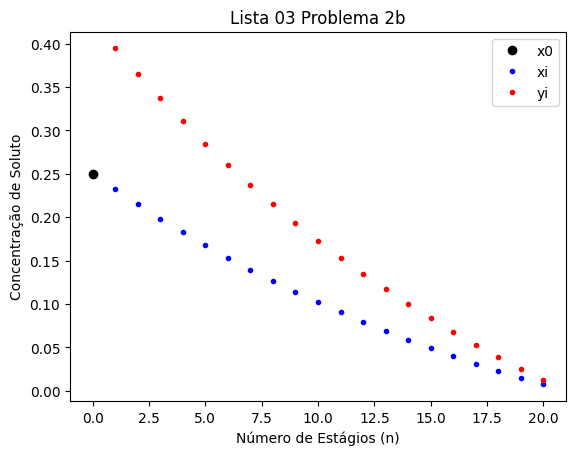

In [ ]:
# Dados do Problema
n = 20     # Número de Estágios
S = 40.0  # Vazão do solvente (kg/h)
F = 65.0  # Vazão da alimentação (kg/h)
yo = 0.0    # Concentração inicial de soluto no solvente
K = 1.7    # Constante de Equilíbrio
xin = 0.25  # Concentração inicial de soluto na alimentação

# Inicializar/Alocar variáveis
A = np.zeros((n, n))
b = np.zeros(n)
x = np.zeros(n)

# Montar o Sistema de Equações
for i in range(n):
    if i == 0:
        A[i, 0] = -(1 + S * K / F)
        A[i, 1] = S * K / F
        b[i] = -xin
    elif i == n - 1:
        A[i, n - 2] = 1
        A[i, n - 1] = -(1 + K * S / F)
        b[i] = -K * S / F * yo
    else:
        A[i, i - 1] = 1
        A[i, i] = -(1 + K * S / F)
        A[i, i + 1] = K * S / F

# Chamar a Função de Decomposição LU
# Eliminação (Forward) para obter L e U
L, U = linear_LU(A)

# Chamar a Função de Substituição (Forward) Ly = b
# Substituição (Backward) Ux = y
x = linear_LU_forward_back(L, U, b)

# Imprimir Tabela
print('n \t xi \t\t yi')
print('--------------------------------')
print(f'0 \t {xin:.4f} \t ------')
for i in range(n):
    print(f'{i+1} \t {x[i]:.4f} \t {K*x[i]:.4f}')
print('--------------------------------')

# Plotar o Gráfico
nstage = np.arange(1,n+1,1)
plt.plot(0, xin, 'ok')
plt.plot(nstage,x,'.b')
plt.plot(nstage,K*x,'.r')
plt.legend(['x0', 'xi', 'yi'])
plt.xlabel('Número de Estágios (n)')
plt.ylabel('Concentração de Soluto')
plt.title('Lista 03 Problema 2b')

plt.show()

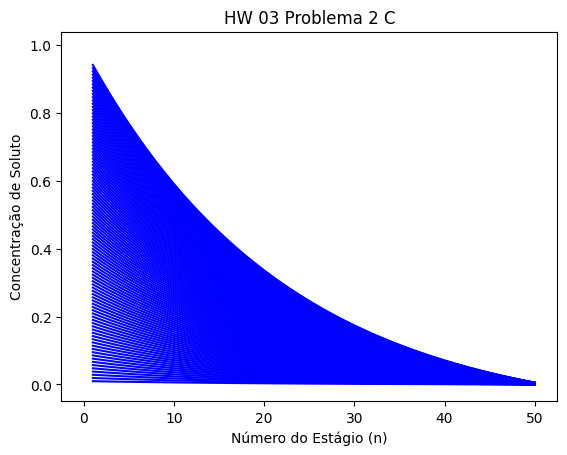

In [ ]:
# Dados do Problema
n = 50     # Número de Estágios
S = 40.0  # Vazão do solvente (kg/h)
F = 65.0  # Vazão da alimentação (kg/h)
yo = 0.0    # Concentração inicial de soluto no solvente
K = 1.7    # Constante de Equilíbrio

xin = np.arange(0.01,1,0.01) # Concentração inicial de soluto na alimentação

# Inicializar/Alocar variáveis
A = np.zeros((n, n))
b = np.zeros(n)
ntimes = len(xin)
x = np.zeros((n, ntimes)) # Definir x como uma matriz!


# Montar o Sistema de Equações
for i in range(n):
    for j in range(n):
        if i == 0:
            A[i, 0] = -(1 + S * K / F)
            A[i, 1] = S * K / F
        elif i == n - 1:
            A[i, n - 2] = 1
            A[i, n - 1] = -(1 + K * S / F)
            b[i] = -S / F * yo
        else:
            A[i, i - 1] = 1
            A[i, i] = -(1 + K * S / F)
            A[i, i + 1] = K * S / F

# Resolver por Decomposição LU
# Eliminação (Forward) para obter L e U
L, U = linear_LU(A)

# Fazer um loop para diferentes concetrações iniciais
for k in range(0,ntimes):
    b[0] = -xin[k]
    x[:,k] = linear_LU_forward_back(L, U, b)

# Plotar o Gráfico
nstage = np.arange(1,n+1,1)
for k in range(0,ntimes):
    plt.plot(0, xin[k], 'k')
    plt.plot(nstage, x[:, k], 'b')
plt.xlabel('Número do Estágio (n)')
plt.ylabel('Concentração de Soluto')
plt.title('HW 03 Problema 2 C')
plt.show()
